In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Link da base de dados
# https://calmcode.io/datasets/smoking

In [5]:
# DataFrame de fumantes
df = pd.read_csv('/content/smoking.csv')

In [6]:
# DataFrame reduzido a 5 linhas
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [ ]:
# Informações Gerais
df.describe()

,age
count,1314.000000
mean,46.920091
std,17.432027
min,18.000000
25%,32.000000
50%,46.000000
75%,61.000000
max,84.000000


In [ ]:
# Informações de Linhas, colunas, tipo ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [ ]:
# Primeiro deixar colunas iguals
# função upper() deixar as linhas todas maiúsculas
df['outcome'].str.upper()
df['smoker'].str.upper()
df.head(5)

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


# Quantas pessoas fumas ?

# Quantas pessoas não fumam ?

In [ ]:
# Total de fumantes
# A função shape() retorna apenas o numeros '0' linhas '1' colunas
fumantes_total = df[df['smoker'] == 'Yes'].shape[0]
print(f'Total de Fumantes: {fumantes_total}')

Total de Fumantes: 582


In [ ]:
# Total de não fumantes
# A função shape() retorna apenas o numeros '0' linhas '1' colunas
no_fumantes = df[df['smoker']=='No'].shape[0]
print(f'Total de não fumantes: {no_fumantes}')

Total de não fumantes: 732


In [ ]:
# verficando
732+582

1314

# Pessoas que fumam tende a viver menos ?

In [ ]:
# Vamos agrupar por coluna 'smoker' e tirar uma média da coluna 'age'
df_quem_vive_mais = df.groupby('smoker')['age'].mean()
print('Média de idade por fumante: ',df_quem_vive_mais)

Média de idade por fumante:  smoker
No     48.699454
Yes    44.682131
Name: age, dtype: float64


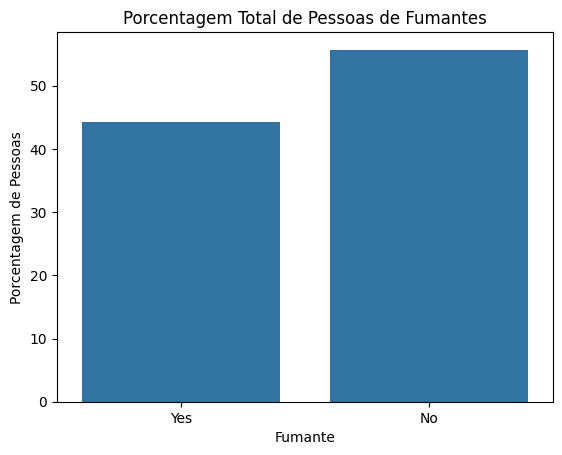

In [ ]:
# Plotar gráfico de barras
sns.barplot(x='smoker', y='age', data=df, estimator = lambda x: len(x) / len(df) * 100)
plt.xlabel('Fumante')
plt.ylabel('Porcentagem de Pessoas')
plt.title('Porcentagem Total de Pessoas de Fumantes')
plt.show()

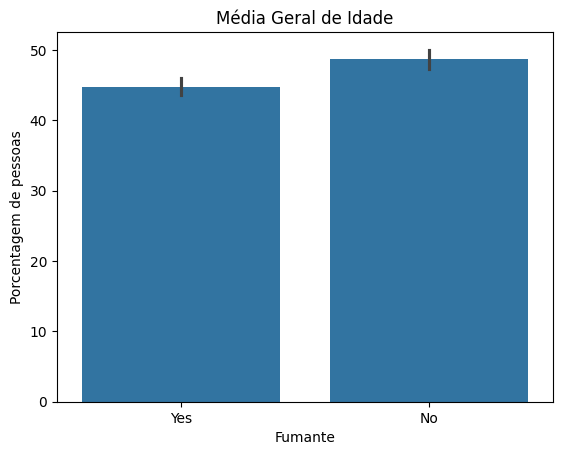

In [ ]:
# gráfico por média de idade geral
sns.barplot(data= df, x= 'smoker', y= 'age')
plt.xlabel('Fumante')
plt.ylabel('Porcentagem de pessoas')
plt.title('Média Geral de Idade')
plt.show()

# Pessoas que fumam tende a viver menos ?

# Resposta: Sim

--------------------------------------------------------------------------------

# Quais são as faixas de idade que mais fumam ?

# Se detalhamos por faixas de idades quem viveu mais ?

In [ ]:
# criar faixas de idades
# primeiro buscamos a memor e maior idade para criar as faixas
df['age'].sort_values(ascending=False)

107     84
1239    84
1252    84
616     84
1188    84
        ..
1012    18
1275    18
528     18
438     18
413     18
Name: age, Length: 1314, dtype: int64

In [ ]:
# adicionamos outro coluna para comparar
# com a função pd.cut() para agrupar
df['age_group'] = pd.cut(df['age'], bins=[0,20,30,40,50,60,70,80,90], labels= ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90'], right= False)
df.sort_values(by='age',ascending=False)

,outcome,smoker,age,age_group
107,Dead,No,84,81-90
1239,Dead,No,84,81-90
1252,Dead,No,84,81-90
616,Dead,No,84,81-90
1188,Dead,Yes,84,81-90
...,...,...,...,...
1012,Alive,No,18,0-20
1275,Alive,Yes,18,0-20
528,Alive,No,18,0-20
438,Alive,No,18,0-20


In [ ]:
# outro modo de criar em listas e epois chamar na função
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
# testando
df.head()

,outcome,smoker,age,age_group
0,Alive,Yes,23,21-30
1,Alive,Yes,18,0-20
2,Dead,Yes,71,71-80
3,Alive,No,67,61-70
4,Alive,No,64,61-70


In [ ]:
# Agrupando por faixa de idade a tabela
df_agrupado = df.groupby('age_group')['age'].count()
df_agrupado

age_group
0-20      35
21-30    226
31-40    264
41-50    206
51-60    213
61-70    211
71-80    118
81-90     41
Name: age, dtype: int64

In [ ]:
# agrupar por faixa de idade fumantes
df_fumantes = df[df['smoker'] == 'Yes'].groupby('age_group').size()
df_fumantes

age_group
0-20      16
21-30     96
31-40    124
41-50    118
51-60    112
61-70     82
71-80     25
81-90      9
dtype: int64

In [ ]:
# agrupando por faixa de idade não fumantes
df_nao_fumantes = df[df['smoker'] == 'No'].groupby('age_group').size()
df_nao_fumantes

age_group
0-20      19
21-30    130
31-40    140
41-50     88
51-60    101
61-70    129
71-80     93
81-90     32
dtype: int64

In [ ]:
# testando o resultado
soma = df_fumantes + df_nao_fumantes
soma

age_group
0-20      35
21-30    226
31-40    264
41-50    206
51-60    213
61-70    211
71-80    118
81-90     41
dtype: int64

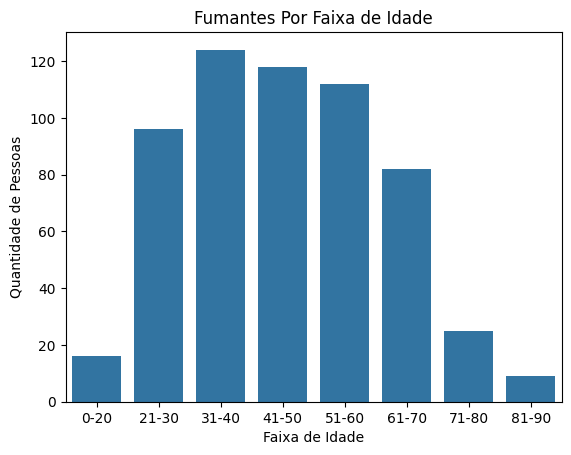

In [ ]:
sns.barplot(data = df_fumantes)
plt.ylabel('Quantidade de Pessoas')
plt.xlabel('Faixa de Idade')
plt.title('Fumantes Por Faixa de Idade')
plt.show()

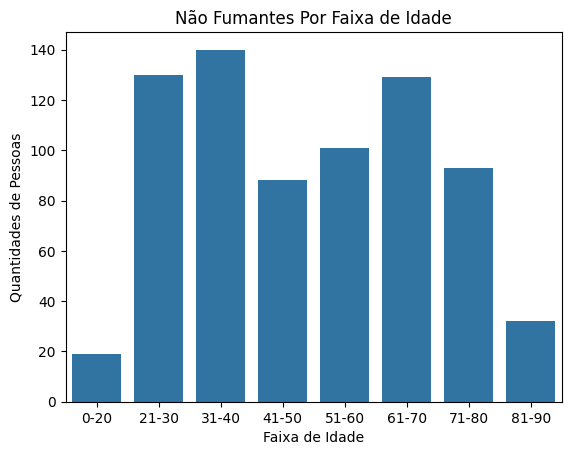

In [ ]:
sns.barplot(data = df_nao_fumantes)
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidades de Pessoas')
plt.title('Não Fumantes Por Faixa de Idade')
plt.show()

In [ ]:
# morreram por faixa de idade não fumantes
df_morreram_nao_fumantes = df[(df['outcome'] == 'Dead') & (df['smoker'] == 'No')].groupby('age_group').size()
df_morreram_nao_fumantes

age_group
0-20      1
21-30     2
31-40     6
41-50    10
51-60    25
61-70    72
71-80    82
81-90    32
dtype: int64

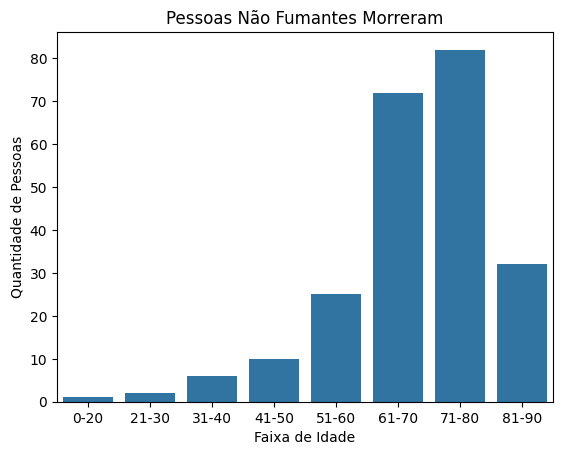

In [ ]:
# gráfico por faixa de idade náo fumantes que morreram
sns.barplot(df_morreram_nao_fumantes)
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Pessoas Não Fumantes Morreram')
plt.show()

In [ ]:
# fumantes que morreram por faixa de idade
df_fumantes_morreram = df[(df['smoker'] == 'Yes') & (df['outcome'] == 'Alive')].groupby('age_group').size()
df_fumantes_morreram

age_group
0-20      16
21-30     93
31-40    119
41-50     96
51-60     78
61-70     38
71-80      3
81-90      0
dtype: int64

In [ ]:
# gráfico fumantes que morreram por faixa de idade
sns.barplot(data = df_fumantes_morreram)
plt.xlabel('Faixa por Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Pessoa Fumantes Que Morreram')
plt.show()